#Análisis Demográfico y Socioeconómico de EE. UU. Basado en Datos del Censo 2022

Para ver presentación ejecutiva del trabajo usar este enlace https://drive.google.com/drive/folders/1EI_cTqD_LMXjo3hBNwvplko7ZNTNYq5Z?usp=sharing

### Abstracto
El presente análisis tiene como objetivo explorar datos del censo de EE. UU. recopilados para el 2022, se hace lectura de los periodos 2012 y 2018 para demostrar manejo del uso de la API pública, con un enfoque en comprender las tendencias demográficas, económicas y sociales en diferentes estados y regiones. Este estudio es fundamental para identificar patrones de crecimiento poblacional, cambios en la composición étnica, disparidades en ingresos y vivienda, y otras dinámicas clave que pueden influir en la planificación de políticas públicas y estrategias empresariales. La audiencia objetivo incluye analistas de políticas, investigadores sociales, planificadores urbanos y ejecutivos del sector privado que buscan tomar decisiones informadas basadas en datos demográficos y socioeconómicos.


### Preguntas


*  ¿Cuál es la relación en el ingreso medio del hogar y el valor medio de la vivienda?


* ¿Cuál es la relación entre edad mediana e ingreso per -cápita por región?

*  ¿Cómo varía la tasa de desempleo según el nivel educativo (universitario o más) en 2022?

* ¿Cuál es la relación entre la edad mediana de la población y el ingreso per cápita en 2022?

### Hipótesis

* Las regiones con un mayor ingreso medio del hogar tienden a tener un valor medio de vivienda más alto, ya que los hogares con mayores ingresos pueden permitirse viviendas de mayor valor


*  Las regiones con una edad mediana más alta tienden a tener un ingreso per cápita más bajo, ya que una mayor proporción de población en edad de jubilación podría estar asociada con ingresos más bajos en comparación con regiones con una población más joven y activa laboralmente.

*  Las personas con un nivel educativo más alto tienden a experimentar tasas de desempleo más bajas debido a una mayor empleabilidad y habilidades especializadas que son demandadas en el mercado laboral.

* Las regiones con una edad mediana más alta tienden a tener un ingreso per cápita más alto, ya que una mayor proporción de población de mayor edad podría estar en etapas avanzadas de su carrera profesional

* Las regiones con valores de vivienda más altos tienden a tener gastos medios de vivienda más altos, ya que el costo de mantener y asegurar propiedades de mayor valor generalmente resulta en mayores gastos asociados



## Importamos datos accediendo vía API

In [96]:
#Importar librerias a usar
import requests
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt




In [97]:
# Extaer los datos usando API abierta que no requiere key, sino que determinemos los parámetros para la API
dataset = "acs/acs5"
# Variables que deseamos obtener
variables = {
    "NAME": "estado",                    # Nombre de la ubicación (estado, condado, etc.)
    "B01003_001E": "poblacion_total",              # Población total
    "B02001_002E": "poblacion_blanca",             # Población blanca
    "B02001_003E": "poblacion_negra",              # Población negra o afroamericana
    "B19013_001E": "ingreso_medio_hogar",          # Ingreso medio por hogar
    "B25077_001E": "valor_medio_vivienda",         # Valor medio de la vivienda
    "B15003_001E": "poblacion_educacion_total",    # Población total con educación (25 años o más)
    "B15003_022E": "bachillerato_o_mas",           # Bachillerato o más
    "B15003_023E": "universitario_o_mas",   # Título universitario o más
    "B23025_002E": "fuerza_laboral", # Participación en la fuerza laboral
    "B23025_005E": "desempleo",                    # Desempleo
    "B25001_001E": "total_vivienda",      # Número total de unidades de vivienda
    "B25002_003E": "vivienda_ocupadas",   # Unidades de vivienda ocupadas
    "B25064_001E": "renta_media",                  # Renta media
    "B19301_001E": "ingreso_per_capita",           # Ingreso per cápita
    "B02001_004E": "poblacion_asiatica",           # Población asiática
    "B02001_005E": "poblacion_nativa_americana",   # Población nativa americana
    "B02001_006E": "poblacion_otras_razas",        # Población de otras razas
    "B02001_007E": "poblacion_dos_o_mas_razas",    # Población de dos o más razas
    "B03002_012E": "poblacion_hispana_o_latina",   # Población hispana o latina
    "B01002_001E": "edad_mediana",                 # Mediana de edad
    "B25034_001E": "ano_construccion_vivienda",    # Año de construcción de la vivienda
    "B25058_001E": "gastos_medios_vivienda"        # Gastos medios de vivienda
}

# Concatenamos las variables con su equivalencia
variables_str = ",".join(variables.keys())

# Filtramos todos los estados
geography = "state:*"

#Determinamos los años relevantes para el análisis

años = ["2012", "2018", "2022"]


In [98]:
# Crear un DataFrame vacío para almacenar los datos
all_data = pd.DataFrame()

for año in años:
    # URL completa de la API
    base_url = f"https://api.census.gov/data/{año}/{dataset}"
    # Solicitud a la API
    url = f"{base_url}?get={variables_str}&for={geography}"

    # Solicitud a la API con manejo de errores
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP errors
        data = response.json()

        # Convertir los datos a un DataFrame
        df = pd.DataFrame(data[1:], columns=data[0])
        df['Año'] = año
        #Renombrar las columnas

        df.rename(columns=variables, inplace=True)

        # Concatenar los datos al DataFrame principal
        all_data = pd.concat([all_data, df], ignore_index=True)

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for year {año}: {e}")

# Mostrar el DataFrame final
print(all_data)

            estado poblacion_total poblacion_blanca poblacion_negra  \
0          Alabama         4777326          3321318         1256097   
1           Alaska          711139           477985           24219   
2          Arizona         6410979          5085954          262284   
3         Arkansas         2916372          2285577          453062   
4       California        37325068         23252553         2254160   
..             ...             ...              ...             ...   
151     Washington         7688549          5374874          301477   
152  West Virginia         1792967          1639342           61227   
153      Wisconsin         5882128          4854979          363331   
154        Wyoming          577929           504798            4891   
155    Puerto Rico         3272382          1425431          286388   

    ingreso_medio_hogar valor_medio_vivienda poblacion_educacion_total  \
0                 43160               122300                   3166424   

In [99]:
all_data.head()

,estado,poblacion_total,poblacion_blanca,poblacion_negra,ingreso_medio_hogar,valor_medio_vivienda,poblacion_educacion_total,bachillerato_o_mas,universitario_o_mas,fuerza_laboral,...,poblacion_asiatica,poblacion_nativa_americana,poblacion_otras_razas,poblacion_dos_o_mas_razas,poblacion_hispana_o_latina,edad_mediana,ano_construccion_vivienda,gastos_medios_vivienda,state,Año
0,Alabama,4777326,3321318,1256097,43160,122300,3166424,448117,182960,2265008,...,26166,54923,1298,50685,182268,37.8,2172647,488,01,2012
1,Alaska,711139,477985,24219,69917,237900,447543,79441,30708,389890,...,98976,37968,7363,7836,40371,33.8,305445,950,02,2012
2,Arizona,6410979,5085954,262284,50256,175900,4149955,702007,288414,3049419,...,283805,177598,12506,408851,1902946,36.0,2841432,742,04,2012
3,Arkansas,2916372,2285577,453062,40531,106300,1921039,252579,89971,1377211,...,17390,35744,5516,62979,185239,37.4,1316874,468,05,2012
4,California,37325068,23252553,2254160,61400,383900,24117317,4667570,1766387,18821426,...,291505,4921543,144236,4914220,14024109,35.2,13667226,1110,06,2012


In [100]:
regiones = {
    'Noreste': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'],
    'Medio oeste': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'Sur': ['Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'Oeste': ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'],
    'Territorio': ['Puerto Rico']
}

# Invertir el diccionario para tener estado como clave y región como valor
estado_a_region = {state: region for region, states_list in regiones.items() for state in states_list}

# Crear la nueva columna 'region' en el DataFrame
all_data['region'] = all_data['estado'].map(estado_a_region)

In [101]:
df=all_data.copy()

In [102]:
#Codigo para exportar la data en caso que se requiera
#df.to_csv('data_censo.csv', index=False)

#En caso de que se deseara exportar a json sería:
#df.to_json('data_censo.json', orient='records', lines=True)


### Análisis exploratorio

In [103]:
df.head()

,estado,poblacion_total,poblacion_blanca,poblacion_negra,ingreso_medio_hogar,valor_medio_vivienda,poblacion_educacion_total,bachillerato_o_mas,universitario_o_mas,fuerza_laboral,...,poblacion_nativa_americana,poblacion_otras_razas,poblacion_dos_o_mas_razas,poblacion_hispana_o_latina,edad_mediana,ano_construccion_vivienda,gastos_medios_vivienda,state,Año,region
0,Alabama,4777326,3321318,1256097,43160,122300,3166424,448117,182960,2265008,...,54923,1298,50685,182268,37.8,2172647,488,01,2012,Sur
1,Alaska,711139,477985,24219,69917,237900,447543,79441,30708,389890,...,37968,7363,7836,40371,33.8,305445,950,02,2012,Oeste
2,Arizona,6410979,5085954,262284,50256,175900,4149955,702007,288414,3049419,...,177598,12506,408851,1902946,36.0,2841432,742,04,2012,Oeste
3,Arkansas,2916372,2285577,453062,40531,106300,1921039,252579,89971,1377211,...,35744,5516,62979,185239,37.4,1316874,468,05,2012,Sur
4,California,37325068,23252553,2254160,61400,383900,24117317,4667570,1766387,18821426,...,4921543,144236,4914220,14024109,35.2,13667226,1110,06,2012,Oeste


In [104]:
df.dtypes

,0
estado,object
poblacion_total,object
poblacion_blanca,object
poblacion_negra,object
ingreso_medio_hogar,object
valor_medio_vivienda,object
poblacion_educacion_total,object
bachillerato_o_mas,object
universitario_o_mas,object
fuerza_laboral,object


Dado que no están en el formato adecuado, procedemos a realizar las modificaciones apropiadas:

In [105]:
# Convertir columnas numéricas
cols_to_numeric = df.columns[1:-2]  # Excluir la columna de nombres y geografía
df[cols_to_numeric] = df[cols_to_numeric].apply(pd.to_numeric, errors='coerce')


In [106]:
#Conteo de valores nulos
df.isnull().sum()

,0
estado,0
poblacion_total,0
poblacion_blanca,0
poblacion_negra,0
ingreso_medio_hogar,0
valor_medio_vivienda,0
poblacion_educacion_total,0
bachillerato_o_mas,0
universitario_o_mas,0
fuerza_laboral,0


In [107]:
#Validar que sigan todos los estados
df['estado'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Delaware', 'District of Columbia', 'Connecticut',
       'Florida', 'Georgia', 'Idaho', 'Hawaii', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Vermont', 'Utah', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [64]:
#Resumen estadístico de las variables numéricas
print(df.describe())

Resumen estadístico de las variables numéricas:
       poblacion_total  poblacion_blanca  poblacion_negra  \
count     1.560000e+02      1.560000e+02     1.560000e+02   
mean      6.240483e+06      4.414539e+06     7.818211e+05   
std       7.054587e+06      4.493931e+06     9.387817e+05   
min       5.628030e+05      2.394130e+05     4.145000e+03   
25%       1.818721e+06      1.480803e+06     6.622375e+04   
50%       4.284770e+06      3.004786e+06     3.331525e+05   
75%       7.031224e+06      5.438073e+06     1.345405e+06   
max       3.935610e+07      2.352907e+07     3.552579e+06   

       ingreso_medio_hogar  valor_medio_vivienda  poblacion_educacion_total  \
count           156.000000            156.000000               1.560000e+02   
mean          62114.551282         237658.333333               4.208903e+06   
std           14839.493393         118922.565187               4.726210e+06   
min           19515.000000          97300.000000               3.710960e+05   
25%    

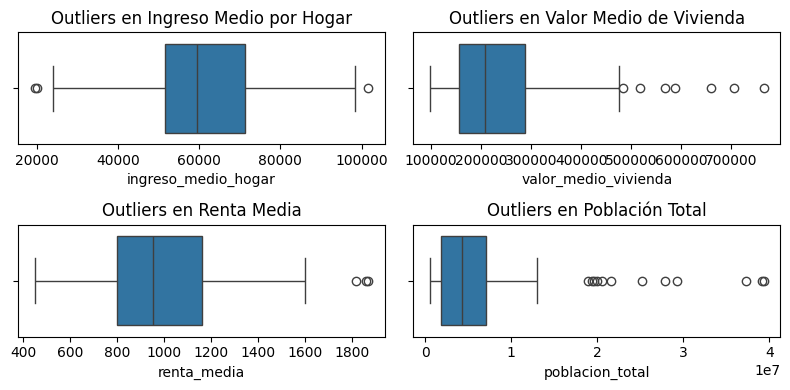

In [108]:
#Boxplots para detectar outliers en variables relevantes
plt.figure(figsize=(8, 4))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['ingreso_medio_hogar'])
plt.title('Outliers en Ingreso Medio por Hogar')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['valor_medio_vivienda'])
plt.title('Outliers en Valor Medio de Vivienda')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['renta_media'])
plt.title('Outliers en Renta Media')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['poblacion_total'])
plt.title('Outliers en Población Total')

plt.tight_layout()
plt.show()

In [109]:
#Crear funcion para conteo de outliers
def count_outliers(df):
    """
    Cuenta el número de outliers en todas las columnas numéricas del DataFrame.
    dict: Diccionario con el nombre de la columna y la cantidad de outliers.
    """
    outliers_count = {}

    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        outliers_count[column] = count

    return outliers_count

In [111]:
#Ejecutar funcion para conteo de outliers
outliers_count = count_outliers(df)
print("Cantidad de outliers por columna numérica:")
for column, count in outliers_count.items():
    print(f"{column}: {count}")

Cantidad de outliers por columna numérica:
poblacion_total: 12
poblacion_blanca: 12
poblacion_negra: 5
ingreso_medio_hogar: 3
valor_medio_vivienda: 7
poblacion_educacion_total: 12
bachillerato_o_mas: 11
universitario_o_mas: 9
fuerza_laboral: 12
desempleo: 13
total_vivienda: 12
vivienda_ocupadas: 12
renta_media: 3
ingreso_per_capita: 1
poblacion_asiatica: 16
poblacion_nativa_americana: 11
poblacion_otras_razas: 20
poblacion_dos_o_mas_razas: 15
poblacion_hispana_o_latina: 20
edad_mediana: 5
ano_construccion_vivienda: 12
gastos_medios_vivienda: 3
state: 0


In [113]:
# Reemplazar outliers con la media

def replace_outliers_with_mean(df):
    """
    Reemplaza los outliers en todas las columnas numéricas del DataFrame con la media de cada columna.
    """
    df_copy = df.copy()

    for column in df_copy.select_dtypes(include=[np.number]).columns:
        # Calcular Q1, Q3, IQR
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)
        IQR = Q3 - Q1

        # Definir límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calcular la media de la columna
        mean = df_copy[column].mean()

        # Reemplazar outliers con la media
        df_copy[column] = df_copy[column].apply(lambda x: mean if x < lower_bound or x > upper_bound else x)

    return df_copy


df_limpio = replace_outliers_with_mean(df)



In [114]:
#Seleccionar ano relevante 2022 y guardamos data sin outliers
df_2022 = df_limpio[df_limpio['Año'] == '2022']


In [115]:
#Generar un df solo para análisis regional que agrupe principales variables de análisis
df_region = df_2022.groupby('region').agg({
    'poblacion_total': 'sum',
    'ingreso_medio_hogar': 'mean',
    'valor_medio_vivienda': 'mean',
    'desempleo': 'mean',
    'universitario_o_mas': 'mean',
    'edad_mediana': 'mean',
    'ingreso_per_capita': 'mean',
    'gastos_medios_vivienda': 'mean'
}).reset_index()

In [116]:
import plotly.express as px

# Ordenar el DataFrame
df_2022_sorted = df_2022.sort_values(by=['ingreso_medio_hogar', 'valor_medio_vivienda'])

# Crear el gráfico de dispersión
fig = px.scatter(
    df_2022_sorted,
    x='ingreso_medio_hogar',
    y='valor_medio_vivienda',
    text='estado',  # Nombre del estado que aparecerá al pasar el cursor
    title='Relación entre Ingreso Medio del Hogar y Valor Medio de la Vivienda por Región (2022)',
    labels={'ingreso_medio_hogar': 'Ingreso Medio del Hogar', 'valor_medio_vivienda': 'Valor Medio de la Vivienda'}
)

# Actualizar el diseño para mostrar el texto cuando se pase el cursor
fig.update_traces(textposition='top center')

# Mostrar el gráfico
fig.show()


Se evidencia una correlación positiva en las variables, tal como se esperaba en el planteamiento de hipótesis. Maryland lidera el ingreso dedio del hogar, mientras que Washington el valor medio de vivienda más alto. Los territorios como Puerto Rico, representan un valor mínimo para ambos atributos.

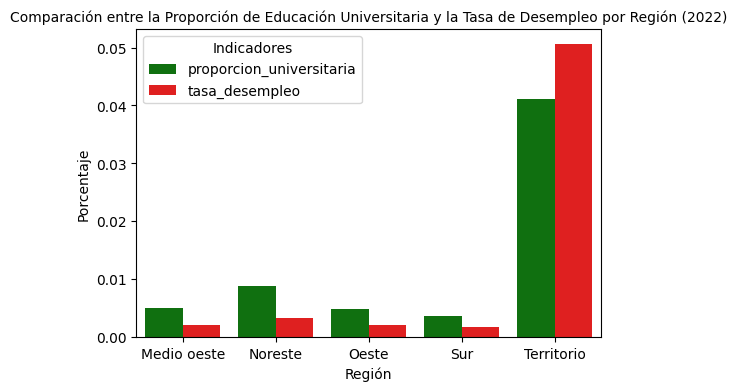

In [117]:
# Calcular la proporción de población con educación universitaria o más por región
df_region['proporcion_universitaria'] = df_region['universitario_o_mas'] / df_region['poblacion_total']

# Calcular la proporción de desempleo sobre población por región
df_region['tasa_desempleo'] = df_region['desempleo'] / df_region['poblacion_total']

# Crear un DataFrame en formato largo para facilitar el gráfico de barras lado a lado
df_long = pd.melt(df_region, id_vars='region', value_vars=['proporcion_universitaria', 'tasa_desempleo'],
                  var_name='Indicador', value_name='Porcentaje')

# Configuración del gráfico
plt.figure(figsize=(6, 4))
sns.barplot(data=df_long, x='region', y='Porcentaje', hue='Indicador', palette=['green', 'red'])
plt.title('Comparación entre la Proporción de Educación Universitaria y la Tasa de Desempleo por Región (2022)', fontsize=10)
plt.ylabel('Porcentaje')
plt.xlabel('Región')
plt.legend(title='Indicadores', loc='upper left')
plt.show()



La tasa de desempleo a excepción de Puerto Rico tiende a tener una correlación inversa con la población con educación universitaria o más. El sesgo puede estar motivado dado que Puerto Rico como territorio tiene menor población y diferente contexto socioeconómico respecto al resto de regiones estadounidenses.


In [118]:
import plotly.express as px

# Crear el gráfico de dispersión
fig = px.scatter(
    df_region,
    x='edad_mediana',
    y='ingreso_per_capita',
    color='region',  # Color por región
    size_max=100,    # Tamaño máximo de los puntos
    title='Relación entre Edad Mediana e Ingreso Per Cápita por Región (2022)',
    labels={'edad_mediana': 'Edad Mediana', 'ingreso_per_capita': 'Ingreso Per Cápita'}
)

# Ajustar el diseño para mejorar la visualización
fig.update_layout(
    legend_title_text='Región',
    legend_title_font_size=12,
    xaxis_title='Edad Mediana',
    yaxis_title='Ingreso Per Cápita')
fig.show()


Se evidencia que no se rechaza la hipótesis planteada, dado que a menor edad mayor es el ingreso. Las regiones con edades promedio entre 38-40 tienen mayor ingreso que las de por encima de 41 anos.




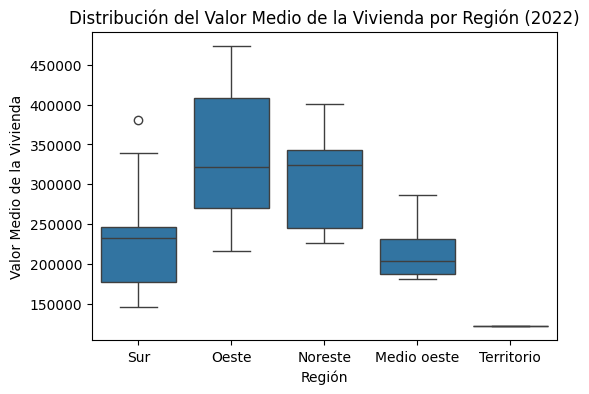

In [119]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_2022, x='region', y='valor_medio_vivienda')
plt.title('Distribución del Valor Medio de la Vivienda por Región (2022)')
plt.xlabel('Región')
plt.ylabel('Valor Medio de la Vivienda')
plt.show()

Se evidencia que la Región Oeste seguido de la Noreste son las de mayor valor medio de la vivienda por región. Esto guarda relación con que estas son también las regiones con mayor ingreso per cápita.

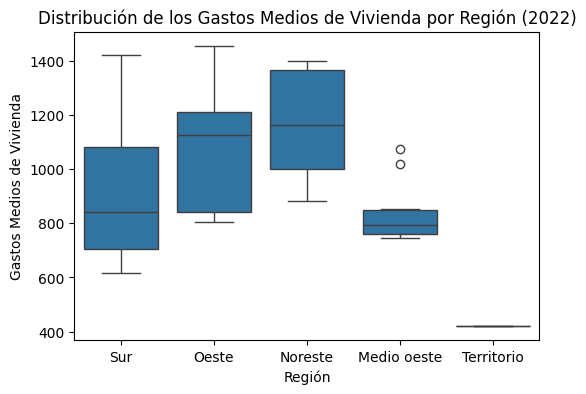

In [120]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_2022, x='region', y='gastos_medios_vivienda')
plt.title('Distribución de los Gastos Medios de Vivienda por Región (2022)')
plt.xlabel('Región')
plt.ylabel('Gastos Medios de Vivienda')
plt.show()



A pesar de ser la segunda región de más bajo ingreso luego de Puerto Rico, es la tercera con mayor gastos medios de vivienda, superando a Medio Oeste y Territorio (PR).

## Conclusión

El análisis revela que las regiones con mayores ingresos medios del hogar tienden a tener valores medios de vivienda más altos, confirmando una relación positiva esperada entre estos dos factores. La Región Oeste y la Región Noreste lideran en valores de vivienda, reflejando sus altos ingresos per cápita. Aunque los gastos medios de vivienda son altos en estas regiones, no siempre se correlacionan directamente con el ingreso, con algunas excepciones notables como en Puerto Rico, donde los altos gastos de vivienda no corresponden con ingresos elevados.

Además, se observa que regiones con una edad mediana más alta tienen ingresos per cápita más bajos, corroborando la hipótesis de que una mayor proporción de población jubilada puede impactar negativamente el ingreso promedio. Finalmente, la mayoría de las regiones con una mayor proporción de educación universitaria presentan tasas de desempleo más bajas, excepto Puerto Rico, lo que sugiere que un mayor nivel educativo está asociado con una mejor empleabilidad.